# Anomalías en equipos industriales

ABSTRACT

Dentro de una industria es esencial realizar seguimiento de las variables. No solo de las que tienen incidencia en resultados financieros sino también en el desempeño de la producción. Dentro del área de mantenimiento se realizan mediciones recurrentes para evitar futuros prejuicios de los equipamentos e instalaciones. Asi no comprometer la seguridad de los mismos y de las personas dentro del establecimiento.

El siguiente dataset ,obtenido desde la página de Kaggle, muestra un registro de variables fisicas (Presión, temperatura, vibración y humedad) en compresores, bombas y turbinas. Los equipos están ubicados en diferentes locaciones dentro de Estados Unidos.


HIPÓTESIS

Se buscará encontrar una relación entre las variables físicas y las veces que ocurrieron fallas en los equipos. 
Se comprobará si alguna de las variables tiene más incidencia en los eventos de fallas. Como por ejemplo, si valores altos de presión son la principal causa de fallas en bombas. O si una alta temperatura lo es para los compresores.

 un abstract (250/500 palabras) de ac. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.

Consigna

Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.

Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.

Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.

Identificar valores perdidos.

Formato

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoDSParteI+Apellido.ipynb”

In [6]:
import pandas as pd

# Cargar el archivo CSV principal
df = pd.read_csv("equipment_anomaly_data.csv")
print(df.head())

print(df.info())


   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty      

In [ ]:
# Crear lista de columnas de tabla informativa
columnas_tabla = [col for col in df.columns ]

# Crear un resumen con tipo de dato y cantidad de valores nulos
resumen = pd.DataFrame({
    'Tipo de dato': df[columnas_tabla].dtypes,
    'Valores nulos': df[columnas_tabla].isnull().sum(),
    'Porcentaje nulos (%)': df[columnas_tabla].isnull().mean() * 100
})

print(resumen)



            Tipo de dato  Valores nulos  Porcentaje nulos (%)
temperature      float64              0                   0.0
pressure         float64              0                   0.0
vibration        float64              0                   0.0
humidity         float64              0                   0.0
equipment         object              0                   0.0
location          object              0                   0.0
faulty           float64              0                   0.0


Según nos muestra este análisis, nuestras columnas no contienen valores nulos (NaN) . Adicionalmente nos muestra el tipo de datos con el que contamos en cada una de ellas.

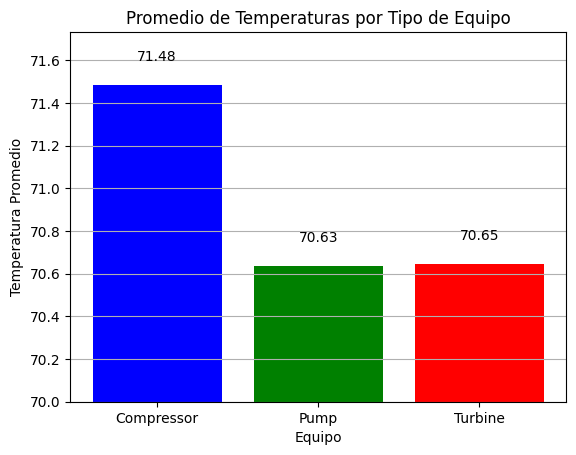

In [28]:
import matplotlib.pyplot as plt

promedios = df.groupby('equipment')['temperature'].mean()


plt.bar(promedios.index, promedios.values, color=['blue', 'green', 'red'])
plt.title('Promedio de Temperaturas por Tipo de Equipo')
plt.xlabel('Equipo')
plt.ylabel('Temperatura Promedio')
plt.grid(axis='y')
# Establecer límites del eje Y (zoom)
plt.ylim(70, max(promedios.values) + 0.25)
# Agregar texto encima de cada barra
for i, valor in enumerate(promedios.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom')
plt.show()


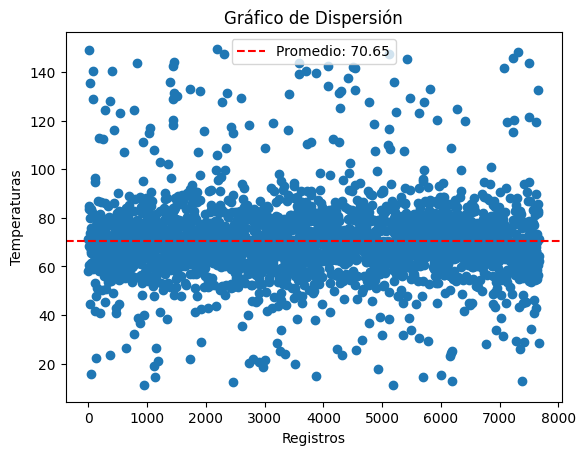

In [12]:
import matplotlib.pyplot as plt 
import numpy as np

df_turbina = df[df['equipment'] == 'Turbine']

x = df_turbina.index
y = df_turbina['temperature']
promedio_tempe= y.mean()

plt.scatter(x, y) 
plt.title('Gráfico de Dispersión') 
plt.xlabel('Registros') 
plt.axhline(promedio_tempe, color='red', linestyle='--', label=f'Promedio: {promedio_tempe:.2f}')
plt.ylabel('Temperaturas') 
plt.legend()
plt.show()

C:\Users\victoria.palma\AppData\Local\Temp\ipykernel_23328\3884424221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='equipment', y='temperature', data=df, palette='Set2')


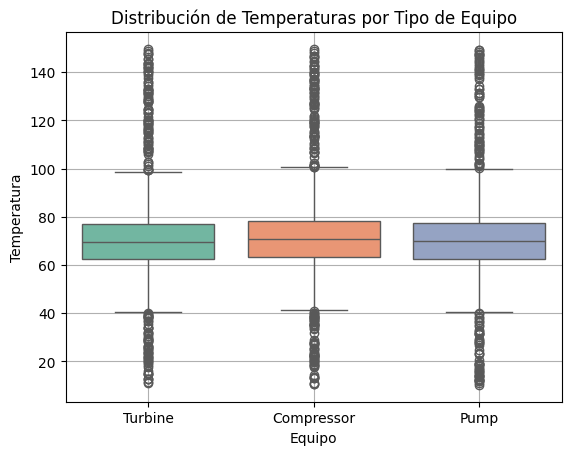

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplot
sns.boxplot(x='equipment', y='temperature', data=df, palette='Set2')

# Personalización
plt.title('Distribución de Temperaturas por Tipo de Equipo')
plt.xlabel('Equipo')
plt.ylabel('Temperatura')
plt.grid(True)

plt.show()
